<a href="https://colab.research.google.com/github/petroismRavi/IPR-TPR/blob/main/project_IPR_TPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IPR

1.Vogel's IPR

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
porosity = float(input("Enter Porosity"))
K = float(input("Enter Perm.(md)"))
h = float(input("Enter pay zone thicknes(Feet)"))
P = float(input("Enter  Reservoir Pressure(psi)"))
Pb = float(input("Enter Bubble Point Pressure(psi)"))
Bo = float(input("Enter Formation Volume Factor"))
Viscosity  = float(input("Enter fluid viscosity(cp)"))
ct = float(input("Enter Total Compressibility(psi-1)"))
A = float(input("Enter Drainage Area(Acres)"))
re=np.sqrt(43560*A/3.14)
rw = float(input("Enter Wellbore radius(ft)"))
S = float(input("Enter Skin Factor"))

Enter Porosity0.19
Enter Perm.(md)8.2
Enter pay zone thicknes(Feet)53
Enter  Reservoir Pressure(psi)5651
Enter Bubble Point Pressure(psi)5651
Enter Formation Volume Factor1.1
Enter fluid viscosity(cp)1.7
Enter Total Compressibility(psi-1)0.0000129
Enter Drainage Area(Acres)640
Enter Wellbore radius(ft)0.328
Enter Skin Factor0


In [3]:
j=K*h/(141.2*Viscosity*Bo*(np.log(re/rw)-0.75+S))
print("The value of productivity index is", j)

The value of productivity index is 0.19678102247296522


In [4]:
qmax=j*P/1.8
print("The value of Qmax is ", qmax, "stb/day")

The value of Qmax is  617.783087774848 stb/day


In [5]:
a=np.arange(0,5500,500)
b=np.append(a,5651)
pwf=b[-1::-1]
pwf

array([5651, 5000, 4500, 4000, 3500, 3000, 2500, 2000, 1500, 1000,  500,
          0])

In [6]:
flowrate=[]
for i in pwf:
    q=qmax*(1-0.2*(i/P)-0.8*((i/P)**2))
    flowrate.append(q)
flowrate

[0.0,
 121.54544965238878,
 205.99154977200774,
 282.69935293443274,
 351.6688591396637,
 412.9000683877007,
 466.3929806785436,
 512.1475960121925,
 550.1639143886474,
 580.4419358079083,
 602.9816602699751,
 617.783087774848]

In [7]:
vogel=pd.DataFrame({'pwf':pwf,'q':flowrate})

In [8]:
vogel

,pwf,q
0,5651,0.000000
1,5000,121.545450
2,4500,205.991550
3,4000,282.699353
4,3500,351.668859
5,3000,412.900068
6,2500,466.392981
7,2000,512.147596
8,1500,550.163914
9,1000,580.441936


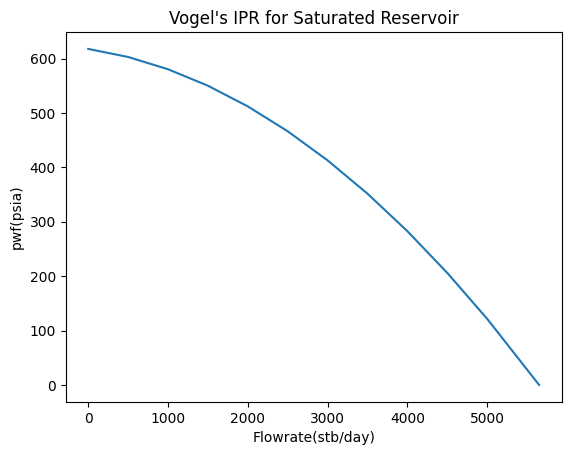

In [9]:
plt.figure()
plt.plot(vogel['pwf'],vogel['q'])
plt.xlabel("Flowrate(stb/day)")
plt.ylabel("pwf(psia)")
plt.title("Vogel's IPR for Saturated Reservoir")
plt.show()

2. Comparison between Vogel's and Fetkovich's Model

In [10]:
Pr = float(input("Enter the Reservoir Pressure(psia): "))
Pwf1 = float(input("Enter the first testing pressure(psia): "))
q1 = float(input("Enter the tested flowrate at first testing pressure(stb/day): "))
Pwf2 = float(input("Enter the second testing pressure(psia): "))
q2 = float(input("Enter the tested flowrate at second testing pressure(stb/day): "))

Enter the Reservoir Pressure(psia): 3000
Enter the first testing pressure(psia): 2000
Enter the tested flowrate at first testing pressure(stb/day): 500
Enter the second testing pressure(psia): 1000
Enter the tested flowrate at second testing pressure(stb/day): 800


In [11]:
##Vogel Calculation
qmax=q1/(1-0.2*(Pwf1/Pr)-0.8*((Pwf1/Pr)**2))
Pressures = np.arange(0,3500,500)
flowrate_vogel=[]
for i in Pressures:
    q=qmax*(1-0.2*(i/Pr)-0.8*((i/Pr)**2))
    flowrate_vogel.append(q)
flowrates_vogel = np.array(flowrate_vogel)

In [12]:
##Fetkovich Calculation_
n = np.log10(q1/q2)/(np.log10((Pr**2-Pwf1**2)/(Pr**2-Pwf2**2)))
C = q1/((Pr**2-Pwf1**2)**n)
flowrate_Fetkovich = []
for j in Pressures:
    Q = float(C*((Pr**2-j**2)**n))
    flowrate_Fetkovich.append(Q)
flowrates_Fetkovich =np.array(flowrate_Fetkovich)

In [13]:
##Dataframe and Plotting
flowrates_Fetkovich = pd.Series(flowrate_Fetkovich)
flowrates_vogel = pd.Series(flowrate_vogel)
Pressure = pd.Series(Pressures)
df = pd.DataFrame()
df["Pressures"] = Pressure
df["flowrates_vogel"] =flowrates_vogel
df["flowrates_Fetkovich"] = flowrates_Fetkovich
flowrate = df[["flowrates_vogel","flowrates_Fetkovich"]]

   Pressures  flowrates_vogel  flowrates_Fetkovich
0          0       978.260870                900.0
1        500       923.913043                875.0
2       1000       826.086957                800.0
3       1500       684.782609                675.0
4       2000       500.000000                500.0
5       2500       271.739130                275.0
6       3000         0.000000                  0.0


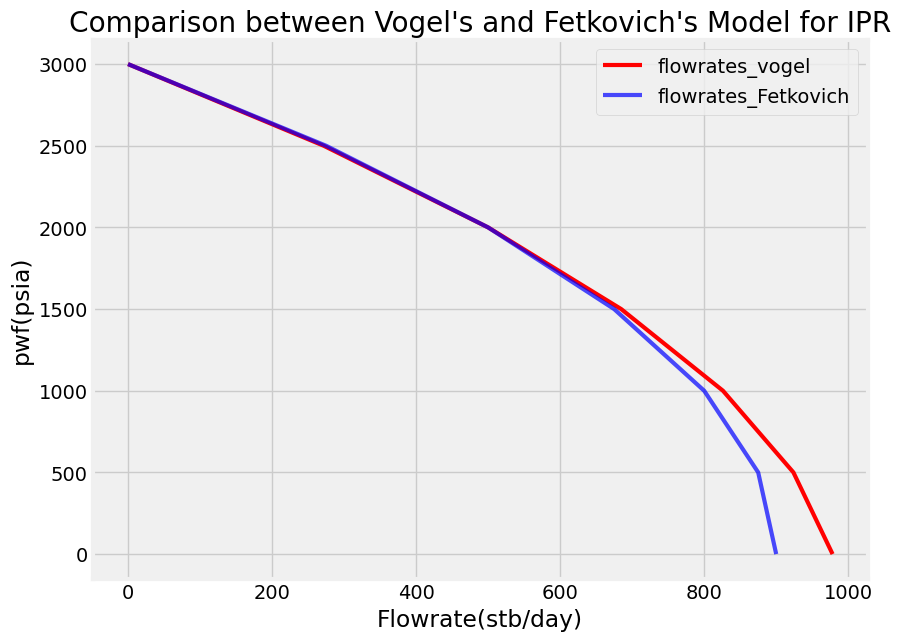

In [14]:
plt.figure(figsize = (10,7))
plt.style.use('fivethirtyeight')
plt.plot(flowrates_vogel,Pressures, c = "red",linewidth=3)
plt.plot(flowrates_Fetkovich,Pressures,c= "blue" ,alpha = 0.7,linewidth=3)
plt.xlabel("Flowrate(stb/day)")
plt.ylabel("pwf(psia)")
plt.grid(True)
plt.legend(flowrate, loc = "best")
plt.title("Comparison between Vogel's and Fetkovich's Model for IPR")
print(df)

Nodal Analysis With Python

Q.) Analyze a gas well to select an appropriate tubing size. The gas well under consideration is at 9,000 ft with a reservoir pressure of 4,000 psia

The first step in applying systems analysis is to select a node to divide the system. Initially, the node is selected to be at the perforations to isolate the inflow performance (reservoir behavior) from the flow behavior in the tubing. For this particular case, the well is flowing at critical flow conditions, and, consequently, the wellhead choke serves as a discontinuity in the system, which allows the use of the wellhead pressure as the terminal point for the outflow curve. Once the node point is selected, the pressure relations for the inflow and outflow sections of the system are determined. For this example, Eqs. 5 and 6 represent the inflow and outflow pressure relationships, respectively.

RTENOTITLE....................(5)

RTENOTITLE....................(6)

With these basic relationships, the flowing bottomhole pressure is calculated for different production rates for both the inflow and outflow sections. Table 1 presents the inflow performance data while Table 2 presents the calculated pressures for three different tubing sizes using a constant wellhead pressure of 1,000 psia. These data are used to construct the inflow and outflow curves in Fig. 3 to estimate the production rates and pressures for each tubing size. The intersection of the outflow curves with the inflow curve dictates the estimated point of continuity and the anticipated producing conditions for the analyzed system. For this example, the production rate increases with increasing tubing size, yielding 4,400 Mscf/D for 1.90-in. tubing, 4,850 Mscf/D for 2 3/8-in. tubing, and 5,000 Mscf/D for 2 7/8-in. tubing.

In [15]:
#First Let's Get the IPR dataset. (Source : PetroWiki)

ipr = pd.DataFrame({'Pwf':[4000,3500,3000,2500,2000,1500,1000,500,14.7],
                    'Q': [0,1999,3094,3902,4512,4963,5275,5458,5519]})

ipr

,Pwf,Q
0,4000.0,0
1,3500.0,1999
2,3000.0,3094
3,2500.0,3902
4,2000.0,4512
5,1500.0,4963
6,1000.0,5275
7,500.0,5458
8,14.7,5519


In [16]:
#Now TPR Data

q = np.arange(1000,6500,500)

p_190 = [1334,1400,1487,1592,1712,1843,1984,2132,2287,2446,2609]

p_2375 = [1298,1320,1351,1390,1435,1487,1545,1609,1677,1749,1824]

p_2875 = [1286,1294,1305,1319,1336,1356,1378,1403,1431,1461,1493]

tpr = pd.DataFrame({'q':q, 'Pwf(1.90" tbg)':p_190, 'Pwf(2.375"tbg)': p_2375,'Pwf(2.875"tbg)':p_2875})

In [17]:
tpr

,q,"Pwf(1.90"" tbg)","Pwf(2.375""tbg)","Pwf(2.875""tbg)"
0,1000,1334,1298,1286
1,1500,1400,1320,1294
2,2000,1487,1351,1305
3,2500,1592,1390,1319
4,3000,1712,1435,1336
5,3500,1843,1487,1356
6,4000,1984,1545,1378
7,4500,2132,1609,1403
8,5000,2287,1677,1431
9,5500,2446,1749,1461


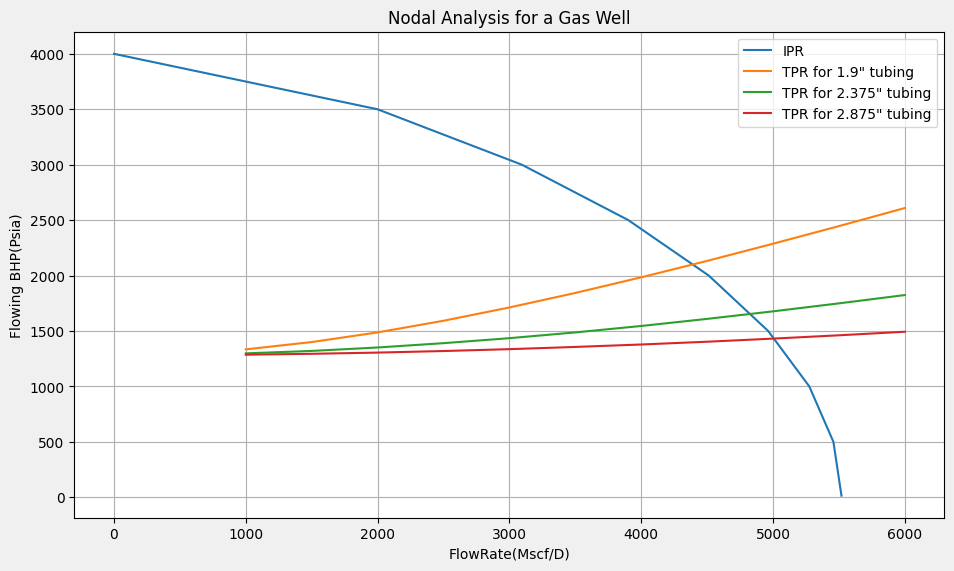

In [18]:
#Let's Plot them now.
plt.figure(figsize=(10,6))
plt.style.use('default')

plt.plot(ipr['Q'], ipr['Pwf'], label = 'IPR', linewidth=1.5)

plt.plot(tpr['q'],tpr['Pwf(1.90" tbg)'],label='TPR for 1.9" tubing', linewidth=1.5)
plt.plot(tpr['q'],tpr['Pwf(2.375"tbg)'],label='TPR for 2.375" tubing', linewidth=1.5)
plt.plot(tpr['q'],tpr['Pwf(2.875"tbg)'],label='TPR for 2.875" tubing', linewidth=1.5)

plt.xlabel('FlowRate(Mscf/D)')
plt.ylabel('Flowing BHP(Psia)')
plt.title('Nodal Analysis for a Gas Well')

plt.grid()

plt.legend(loc='best')

The same well could be analyzed with the wellhead as the system node. This allows the effect of changes in wellhead pressure on well performance to be determined. The new inflow and outflow pressure relationships are

RTENOTITLE....................(7)

for the inflow curve, and

RTENOTITLE....................(8)

for the outflow curve. Table 2 shows the pressure-rate relationship for both the inflow and outflow curves. Because the wellhead is the node in this analysis, the outflow curve will be constant and equal to the anticipated flowing wellhead pressure.

The data are plotted in Fig. 4 and yield the same producing rates and flowing bottomhole pressures that were determined when the flowing bottomhole pressure was used as the node. This is as expected because the choice of a division point or node does not affect the results for a given system. If the wellhead pressure is decreased to 250 psia, the producing rate will change also. This effect is readily determined by constructing a constant wellhead pressure line of 250 psia on the graph and selecting the points of intersection for each tubing size. As observed from the graph, the anticipated production rates increase to 4,950 Mscf/D, 5,200 Mscf/D, and 5,300 Mscf/D for the three tubing sizes by lowering the wellhead pressure.

In [19]:
q = np.arange(1000,5500,500)

pwh_190 = [3487,

3276,

3012,

2700,

2338,

1923,

1445,

879,

164]

pwh_2375 = [3524,
3356,

3149,

2903,

2615,

2279,

1883,

1403,

774]

pwh_2875 = [3536,

3382,

3195,

2973,

2714,

2410,

2050,

1608,

1020]

pwh_out_flow=[1000,

1000,

1000,

1000,

1000,

1000,

1000,

1000,

1000]

In [20]:
ipr_well_head = pd.DataFrame({'q':q, 'Pwh(1.90"tbg)':pwh_190, 'Pwh(2.375"tbg)': pwh_2375,'Pwh(2.875"tbg)':pwh_2875,'Outflow Performance pwh':pwh_out_flow})

In [21]:
ipr_well_head

,q,"Pwh(1.90""tbg)","Pwh(2.375""tbg)","Pwh(2.875""tbg)",Outflow Performance pwh
0,1000,3487,3524,3536,1000
1,1500,3276,3356,3382,1000
2,2000,3012,3149,3195,1000
3,2500,2700,2903,2973,1000
4,3000,2338,2615,2714,1000
5,3500,1923,2279,2410,1000
6,4000,1445,1883,2050,1000
7,4500,879,1403,1608,1000
8,5000,164,774,1020,1000


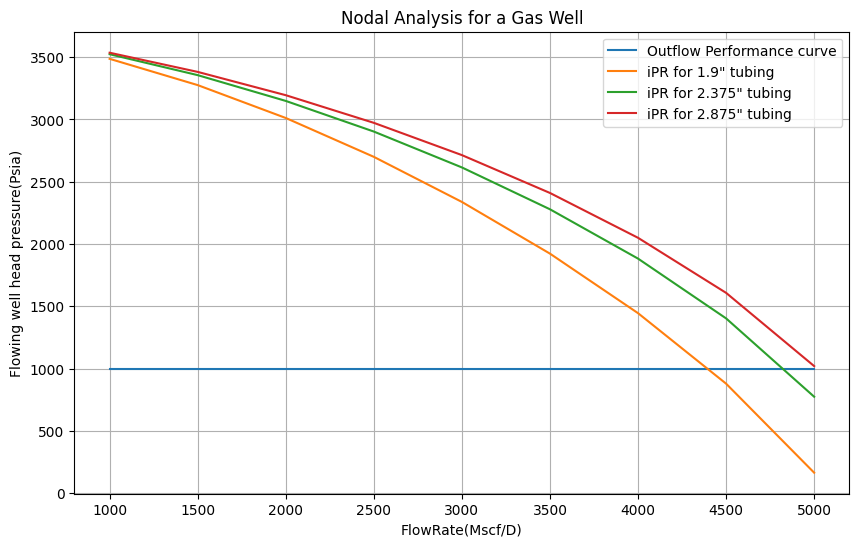

In [22]:
#Let's Plot them now.
plt.figure(figsize=(10,6))
plt.style.use('default')

plt.plot(ipr_well_head['q'], ipr_well_head['Outflow Performance pwh'], label = 'Outflow Performance curve', linewidth=1.5)

plt.plot(ipr_well_head['q'],ipr_well_head['Pwh(1.90"tbg)'],label='iPR for 1.9" tubing', linewidth=1.5)
plt.plot(ipr_well_head['q'],ipr_well_head['Pwh(2.375"tbg)'],label='iPR for 2.375" tubing', linewidth=1.5)
plt.plot(ipr_well_head['q'],ipr_well_head['Pwh(2.875"tbg)'],label='iPR for 2.875" tubing', linewidth=1.5)

plt.xlabel('FlowRate(Mscf/D)')
plt.ylabel('Flowing well head pressure(Psia)')
plt.title('Nodal Analysis for a Gas Well')

plt.grid()

plt.legend(loc='best')